In [1]:
#Cargar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Cargar el dataset
df = pd.read_csv("dirty_cafe_sales.csv")

### Exploración inicial

In [3]:
print(df.head())

  Transaction ID    Item Quantity Price Per Unit Total Spent  Payment Method  \
0    TXN_1961373  Coffee        2            2.0         4.0     Credit Card   
1    TXN_4977031    Cake        4            3.0        12.0            Cash   
2    TXN_4271903  Cookie        4            1.0       ERROR     Credit Card   
3    TXN_7034554   Salad        2            5.0        10.0         UNKNOWN   
4    TXN_3160411  Coffee        2            2.0         4.0  Digital Wallet   

   Location Transaction Date  
0  Takeaway       2023-09-08  
1  In-store       2023-05-16  
2  In-store       2023-07-19  
3   UNKNOWN       2023-04-27  
4  In-store       2023-06-11  


In [4]:
print(df.shape)

(10000, 8)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB
None


In [6]:
#Ver cantidad de valores unicos
df.nunique()

Transaction ID      10000
Item                   10
Quantity                7
Price Per Unit          8
Total Spent            19
Payment Method          5
Location                4
Transaction Date      367
dtype: int64

In [7]:
#Ver cantidad de valores nulos
print(df.isna().sum())

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64


In [9]:
#Ver porcentaje de nulos por columna
df.isna().mean() * 100

Transaction ID       0.00
Item                 3.33
Quantity             1.38
Price Per Unit       1.79
Total Spent          1.73
Payment Method      25.79
Location            32.65
Transaction Date     1.59
dtype: float64

In [10]:
#Ver estadistics descriptivas
print(df.describe())

       Transaction ID   Item Quantity Price Per Unit Total Spent  \
count           10000   9667     9862           9821        9827   
unique          10000     10        7              8          19   
top       TXN_1961373  Juice        5            3.0         6.0   
freq                1   1171     2013           2429         979   

        Payment Method  Location Transaction Date  
count             7421      6735             9841  
unique               5         4              367  
top     Digital Wallet  Takeaway          UNKNOWN  
freq              2291      3022              159  


In [12]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip()

In [14]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')


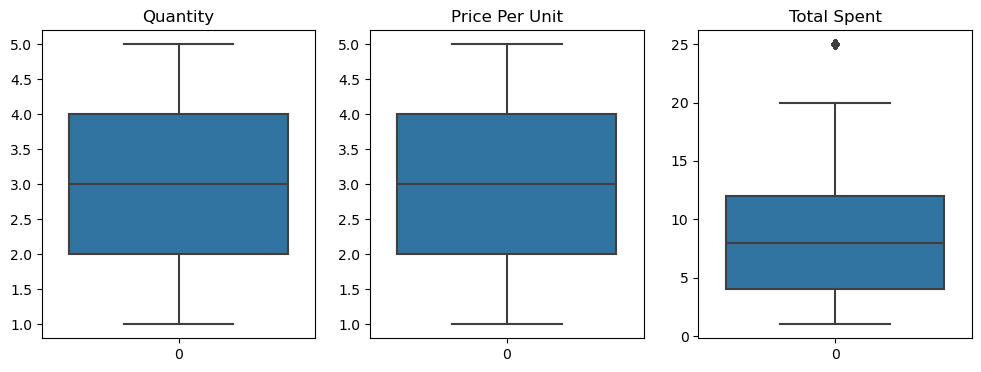

In [15]:
#Boxplot de outliers
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(df['Quantity'])
plt.title('Quantity')

plt.subplot(1,3,2)
sns.boxplot(df['Price Per Unit'])
plt.title('Price Per Unit')

plt.subplot(1,3,3)
sns.boxplot(df['Total Spent'])
plt.title('Total Spent')

plt.show()

In [ ]:
#Outliers de columna Total Spent
Q1 = df['Total Spent'].quantile(0.25)
Q3 = df['Total Spent'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25%): {Q1}")
print(f"Q3 (75%): {Q3}")
print(f"IQR: {IQR}")
print(f"Límite inferior: {lower_bound}")
print(f"Límite superior: {upper_bound}")

outliers = df[(df['Total Spent'] < lower_bound) | (df['Total Spent'] > upper_bound)]

print(f"Cantidad total de outliers: {len(outliers)}")

# Mostrar un resumen estadístico de los outliers
print(outliers['Total Spent'].describe())

### Limpieza de columnas

In [16]:
print("Cantidad de NaN restantes:")
print(df[['Quantity', 'Price Per Unit', 'Total Spent']].isna().sum())

Cantidad de NaN restantes:
Quantity          479
Price Per Unit    533
Total Spent       502
dtype: int64


In [17]:
df['Item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', 'nan', 'ERROR', 'Juice', 'Tea'], dtype=object)

In [18]:
df['Price Per Unit'].unique()

array([2. , 3. , 1. , 5. , 4. , 1.5, nan])

In [19]:
df['Item'] = df['Item'].str.strip().str.capitalize()

In [20]:
# Ver valores únicos posibles de "Price Per Unit" para cada valor en "Item"
check_item = ['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'Unknown',
              'Sandwich', 'Error', 'Juice', 'Tea']

for item in check_item:
    values = df[df['Item'] == item]['Price Per Unit'].dropna().unique()
    print(f'Item: {item} - Valores únicos en "Price Per Unit": {sorted(values)}')

Item: Coffee - Valores únicos en "Price Per Unit": [2.0]
Item: Cake - Valores únicos en "Price Per Unit": [3.0]
Item: Cookie - Valores únicos en "Price Per Unit": [1.0]
Item: Salad - Valores únicos en "Price Per Unit": [5.0]
Item: Smoothie - Valores únicos en "Price Per Unit": [4.0]
Item: Unknown - Valores únicos en "Price Per Unit": [1.0, 1.5, 2.0, 3.0, 4.0, 5.0]
Item: Sandwich - Valores únicos en "Price Per Unit": [4.0]
Item: Error - Valores únicos en "Price Per Unit": [1.0, 1.5, 2.0, 3.0, 4.0, 5.0]
Item: Juice - Valores únicos en "Price Per Unit": [3.0]
Item: Tea - Valores únicos en "Price Per Unit": [1.5]


In [21]:
check_item = ['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'Unknown',
              'Sandwich', 'Error', 'Juice', 'Tea', np.nan]  # Incluye NaN

for item in check_item:
    if pd.isna(item):
        subset = df[df['Item'].isna()]['Price Per Unit']
        item_name = 'NaN'
    else:
        subset = df[df['Item'] == item]['Price Per Unit']
        item_name = item

    count_non_null = subset.notna().sum()
    count_null = subset.isna().sum()
    print(f'Item: {item_name} - Valores no nulos en "Price Per Unit": {count_non_null}, nulos: {count_null}')

Item: Coffee - Valores no nulos en "Price Per Unit": 1108, nulos: 57
Item: Cake - Valores no nulos en "Price Per Unit": 1085, nulos: 54
Item: Cookie - Valores no nulos en "Price Per Unit": 1026, nulos: 66
Item: Salad - Valores no nulos en "Price Per Unit": 1082, nulos: 66
Item: Smoothie - Valores no nulos en "Price Per Unit": 1036, nulos: 60
Item: Unknown - Valores no nulos en "Price Per Unit": 326, nulos: 18
Item: Sandwich - Valores no nulos en "Price Per Unit": 1082, nulos: 49
Item: Error - Valores no nulos en "Price Per Unit": 279, nulos: 13
Item: Juice - Valores no nulos en "Price Per Unit": 1110, nulos: 61
Item: Tea - Valores no nulos en "Price Per Unit": 1023, nulos: 66
Item: NaN - Valores no nulos en "Price Per Unit": 0, nulos: 0


In [22]:
price_item = {
    'Coffee': 2,
    'Cake': 3,
    'Cookie': 1,
    'Salad': 5,
    'Smoothie': 4,
    'Sandwich': 4,
    'Juice': 3,
    'Tea': 1.5
}

for item, price in price_item.items():
    correct_price = (df['Item'] == item) & (df['Price Per Unit'].isna())
    df.loc[correct_price, 'Price Per Unit'] = price

In [23]:
check_item = ['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'Unknown',
              'Sandwich', 'Error', 'Juice', 'Tea', np.nan]  # Incluye NaN

for item in check_item:
    if pd.isna(item):
        subset = df[df['Item'].isna()]['Price Per Unit']
        item_name = 'NaN'
    else:
        subset = df[df['Item'] == item]['Price Per Unit']
        item_name = item

    count_non_null = subset.notna().sum()
    count_null = subset.isna().sum()
    print(f'Item: {item_name} - Valores no nulos en "Price Per Unit": {count_non_null}, nulos: {count_null}')

Item: Coffee - Valores no nulos en "Price Per Unit": 1165, nulos: 0
Item: Cake - Valores no nulos en "Price Per Unit": 1139, nulos: 0
Item: Cookie - Valores no nulos en "Price Per Unit": 1092, nulos: 0
Item: Salad - Valores no nulos en "Price Per Unit": 1148, nulos: 0
Item: Smoothie - Valores no nulos en "Price Per Unit": 1096, nulos: 0
Item: Unknown - Valores no nulos en "Price Per Unit": 326, nulos: 18
Item: Sandwich - Valores no nulos en "Price Per Unit": 1131, nulos: 0
Item: Error - Valores no nulos en "Price Per Unit": 279, nulos: 13
Item: Juice - Valores no nulos en "Price Per Unit": 1171, nulos: 0
Item: Tea - Valores no nulos en "Price Per Unit": 1089, nulos: 0
Item: NaN - Valores no nulos en "Price Per Unit": 0, nulos: 0


In [24]:
price_to_item = {
    2: 'Coffee',
    3: 'Cake',
    1: 'Cookie',
    5: 'Salad',
    3: 'Juice',
    1.5: 'Tea'
}

# Máscara para valores problemáticos en 'Item'
correct_item_name = df['Item'].isin(['Unknown', 'Error']) | df['Item'].isna()

# Reemplazo condicional usando map sobre Price Per Unit
df.loc[correct_item_name, 'Item'] = df.loc[correct_item_name, 'Price Per Unit'].map(price_to_item)

In [25]:
check_item = ['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'Unknown',
              'Sandwich', 'Error', 'Juice', 'Tea', np.nan]  # Incluye NaN

for item in check_item:
    if pd.isna(item):
        subset = df[df['Item'].isna()]['Price Per Unit']
        item_name = 'NaN'
    else:
        subset = df[df['Item'] == item]['Price Per Unit']
        item_name = item

    count_non_null = subset.notna().sum()
    count_null = subset.isna().sum()
    print(f'Item: {item_name} - Valores no nulos en "Price Per Unit": {count_non_null}, nulos: {count_null}')

Item: Coffee - Valores no nulos en "Price Per Unit": 1245, nulos: 0
Item: Cake - Valores no nulos en "Price Per Unit": 1139, nulos: 0
Item: Cookie - Valores no nulos en "Price Per Unit": 1171, nulos: 0
Item: Salad - Valores no nulos en "Price Per Unit": 1232, nulos: 0
Item: Smoothie - Valores no nulos en "Price Per Unit": 1096, nulos: 0
Item: Unknown - Valores no nulos en "Price Per Unit": 0, nulos: 0
Item: Sandwich - Valores no nulos en "Price Per Unit": 1131, nulos: 0
Item: Error - Valores no nulos en "Price Per Unit": 0, nulos: 0
Item: Juice - Valores no nulos en "Price Per Unit": 1325, nulos: 0
Item: Tea - Valores no nulos en "Price Per Unit": 1166, nulos: 0
Item: NaN - Valores no nulos en "Price Per Unit": 131, nulos: 31


In [26]:
df['Quantity'].unique()

array([ 2.,  4.,  5.,  3.,  1., nan])

In [27]:
df['Price Per Unit'].unique()

array([2. , 3. , 1. , 5. , 4. , 1.5, nan])

In [28]:
df['Total Spent'].unique()

array([ 4. , 12. ,  nan, 10. , 20. ,  9. , 16. , 15. , 25. ,  8. ,  5. ,
        3. ,  6. ,  2. ,  1. ,  7.5,  4.5,  1.5])

In [29]:
correct_error = df['Total Spent'].astype(str).str.strip().str.lower() == 'ERROR'
df.loc[correct_error, 'Total Spent'] = (
    df.loc[correct_error, 'Quantity'] * df.loc[correct_error, 'Price Per Unit']
)
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

In [30]:
df['Total Spent'].astype(str).str.strip().str.lower().eq('error').sum()

0

In [31]:
correct_quantity = df['Quantity'].isna() & df['Price Per Unit'].notna() & df['Total Spent'].notna()
df.loc[correct_quantity, 'Quantity'] = df.loc[correct_quantity, 'Total Spent'] / df.loc[correct_quantity, 'Price Per Unit']

In [32]:
correct_unit_price = df['Price Per Unit'].isna() & df['Quantity'].notna() & df['Total Spent'].notna()
df.loc[correct_unit_price, 'Price Per Unit'] = df.loc[correct_unit_price, 'Total Spent'] / df.loc[correct_unit_price, 'Quantity']

In [33]:
print("Cantidad de NaN restantes:")
print(df[['Quantity', 'Price Per Unit', 'Total Spent']].isna().sum())

Cantidad de NaN restantes:
Quantity           23
Price Per Unit      6
Total Spent       502
dtype: int64
